<a href="https://colab.research.google.com/github/Mirabelljoicelaura/PCVK/blob/main/Week7/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


KELOMPOK 8

Nama Anggota Kelompok :

1. Mirabell Joice Laura (2141720174)
2. M. Edwin Isa Alfais (2141720193)
3. Nabilah Amaalina Syafa (2141720198)

# PRAKTIKUM FILTER

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:

## Membuat notebook

## Mengakses file pada drive dan import library

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import numpy as np
import pandas as pd
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
import matplotlib.pyplot as plt


## Konvolusi tanpa Library

Fungsi yang dibuat memiliki beberapa parameter yaitu :
1. citra masukan
2. kernel yang berupa matriks untuk memfilter data
3. nilai stride/besarnya pergeseran setiap konvolusi
4. nilai pad yang akan ditambahkan pada citra

- Load citra yang akan diproses daan ubah menjadi keabuan
- Tentukan kernel yang akan digunaan untuk filter sharpeing
- Memanggil fungsi konvolusi yang telah dibuat dan ditampilkan

In [59]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image


In [60]:
  # Load citra
  img = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')
  # Ubah menjadi keabuan
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

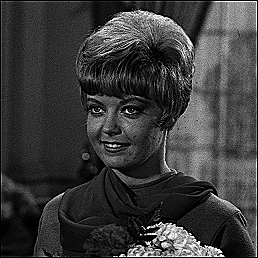

In [61]:
  # Menentukan kernel
  kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

  # Memanggil fungsi konvolusi yang telah dibuat dan ditampilkan
  cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))


## Image Filter

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

### Sharpen

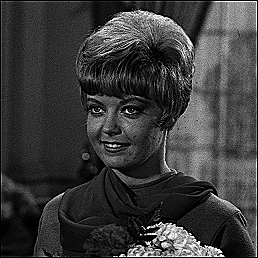

In [62]:
  # Menentukan kernel
  kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

  # Memanggil fungsi konvolusi yang telah dibuat dan ditampilkan
  cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

### Emboss

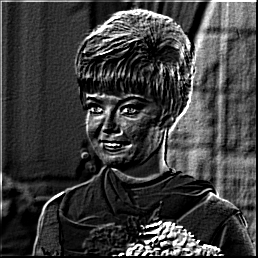

In [63]:
  # Menentukan kernel
  kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])

  # Memanggil fungsi konvolusi yang telah dibuat dan ditampilkan
  cv2_imshow(convolution2d(img_gray,kernel_emboss,1,2))

### Left Sobel Edge Detection

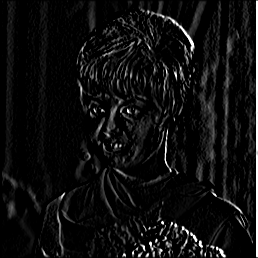

In [64]:
  # Menentukan kernel
  kernel_sobel = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])

  # Memanggil fungsi konvolusi yang telah dibuat dan ditampilkan
  cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

### Canny Edge Detection

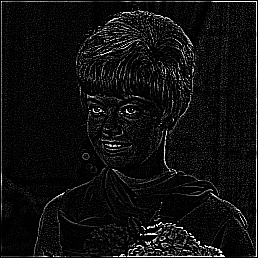

In [65]:
  # Menentukan kernel
  kernel_edge = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])

  # Memanggil fungsi konvolusi yang telah dibuat dan ditampilkan
  cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

### Prewit Edge Detection

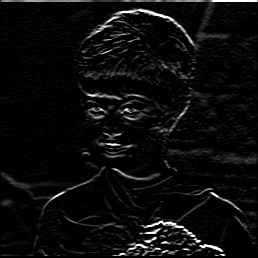

In [66]:
  # Menentukan kernel
  kernel_prewitt = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

  # Memanggil fungsi konvolusi yang telah dibuat dan ditampilkan
  cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

### 5x5 Gaussian Blur

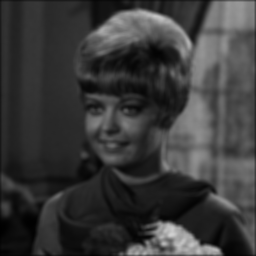

In [67]:
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

### 21x21 Gaussian Blur

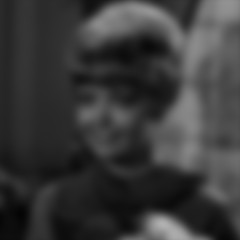

In [68]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# Tugas
Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP


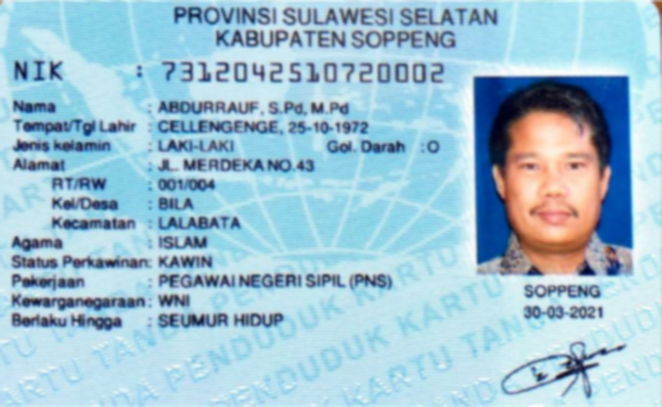

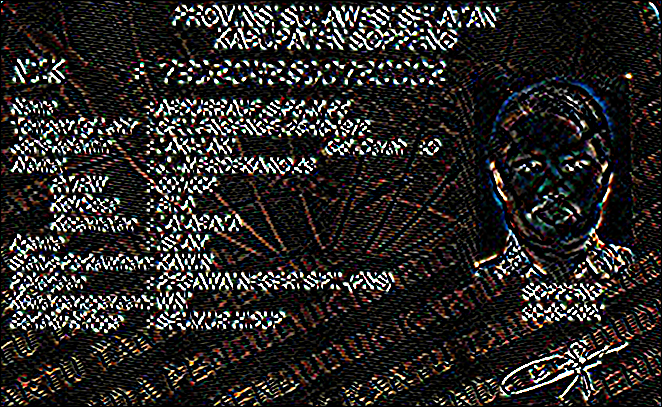

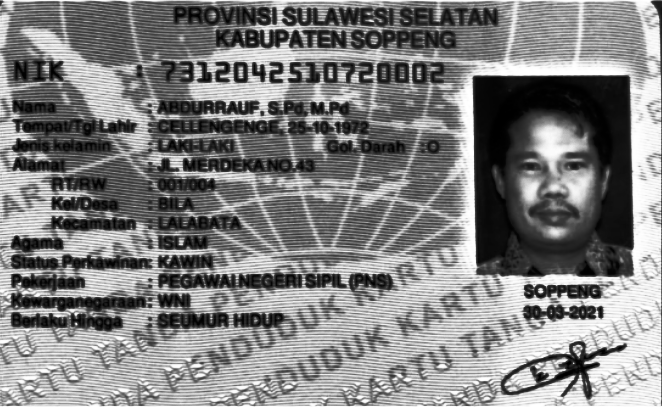

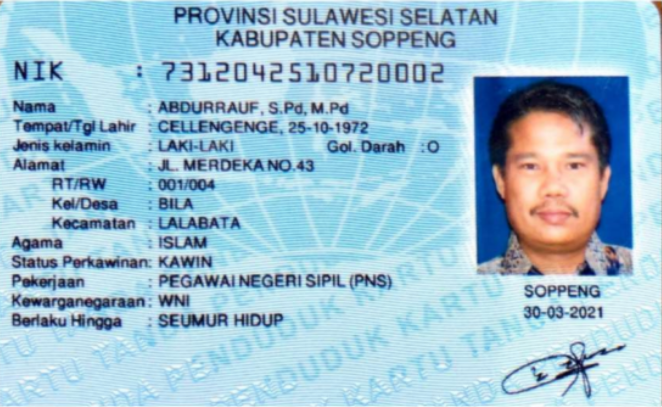

In [71]:
import cv2

# Baca citra KTP
ktp_image = cv2.imread('/content/drive/MyDrive/PCVK/image/ktp.png')
# 1. Filterisasi -> menggunakan Gaussian Blur
filtered_image = cv2.GaussianBlur(ktp_image, (5, 5), 0)

# 2. Deteksi tepi -> menggunakan filter Sobel
edges = cv2.Sobel(ktp_image, cv2.CV_64F, 1, 1, ksize=5)

# 3. Histogram Equalization
gray_image = cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_image)

# 4. Operasi Aritmatika -> menambahkan citra hasil filterisasi dengan citra asli
combined_image = cv2.addWeighted(ktp_image, 0.7, filtered_image, 0.3, 0)

# 5. Tampilkan citra-citra hasil
cv2_imshow(filtered_image)
cv2_imshow(edges)
cv2_imshow(equalized_image)
cv2_imshow(combined_image)